In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train.sample(5)

,Age,Fare
460,48.0,26.55
153,40.5,14.50
658,23.0,13.00
346,40.0,13.00
633,NaN,0.00


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_train.sample(5)

,Age,Fare,Age_imputed
638,41.0,39.6875,41.0
440,45.0,26.2500,45.0
19,NaN,7.2250,NaN
877,19.0,7.8958,19.0
350,23.0,9.2250,23.0


In [10]:
X_test.sample(5)

,Age,Fare,Age_imputed
400,39.0,7.9250,39.0
146,27.0,7.7958,27.0
672,70.0,10.5000,70.0
602,NaN,42.4000,NaN
865,42.0,13.0000,42.0


In [11]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]  # Missing Values in "Age_Imputed"[148 values]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [12]:
X_train['Age'].isnull().sum()

148

In [13]:
X_test['Age'].isnull().sum()

29

In [14]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values   # Random (148) Values

array([ 2.  , 38.  , 34.  , 32.  , 44.  , 26.  , 11.  , 45.  ,  8.  ,
       16.  , 25.  , 18.  , 19.  , 25.  , 16.  , 27.  , 18.  ,  4.  ,
       40.  , 21.  , 25.  , 28.  , 50.  , 30.  , 19.  , 38.  , 28.  ,
       60.  , 24.  , 25.  , 28.  , 40.  , 20.  , 36.5 , 35.  , 33.  ,
       38.  , 35.  , 19.  , 34.  , 54.  ,  1.  , 41.  , 54.  , 26.  ,
       24.  ,  3.  ,  1.  , 33.  , 19.  , 28.  , 16.  , 53.  , 71.  ,
       34.  , 46.  , 40.  , 52.  , 28.  , 24.  , 30.  , 54.  , 39.  ,
       30.  ,  6.  , 22.  , 19.  , 18.  , 32.5 , 30.  , 18.  , 30.  ,
        7.  , 48.  , 28.  , 62.  , 30.  , 33.  , 20.  , 31.  , 41.  ,
       59.  , 31.  , 34.  , 25.  , 17.  , 32.  , 37.  , 58.  , 39.  ,
        0.75, 35.  , 36.  , 23.  , 40.  , 32.5 , 30.  , 31.  , 39.  ,
       45.5 , 32.  , 25.  , 33.  , 42.  , 42.  , 43.  , 26.  , 30.  ,
       24.  , 39.  , 30.  ,  9.  , 26.  , 20.  , 29.  , 31.  , 47.  ,
       47.  , 20.  , 50.  , 16.  , 27.  , 24.  , 44.  , 34.  ,  5.  ,
       20.  , 17.  ,

## Random Value Imputation :

Replace NaN values with Random Samples from the Column

In [15]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [16]:
X_train.sample(5)

,Age,Fare,Age_imputed
270,NaN,31.0000,3.0
147,9.0,34.3750,9.0
695,52.0,13.5000,52.0
240,NaN,14.4542,33.0
490,NaN,19.9667,14.0


In [17]:
X_test.sample(5)

,Age,Fare,Age_imputed
795,39.0,13.0000,39.0
70,32.0,10.5000,32.0
20,35.0,26.0000,35.0
813,6.0,31.2750,6.0
453,49.0,89.1042,49.0


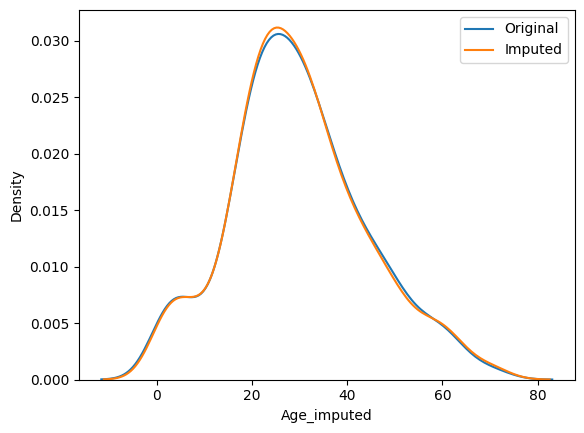

In [18]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [19]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  205.02028488440084


In [20]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,45.623478
Age,71.512440,204.349513,204.349513
Age_imputed,45.623478,204.349513,205.020285


In [21]:
# For same value of 'Fare' , the Random 'Age' generated should be same
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

<Axes: >

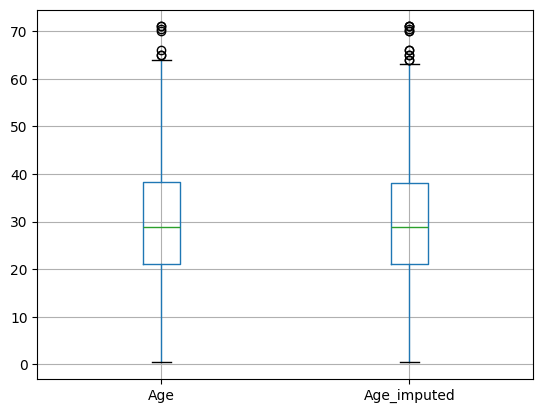

In [22]:
X_train[['Age', 'Age_imputed']].boxplot()

## For Categorical Data :

In [23]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [25]:
X = data
y = data['SalePrice']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [29]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1244,Gd,TA,230000,TA,Gd
555,Gd,TA,113000,TA,Gd
1319,NaN,TA,111000,TA,NaN
424,Gd,TA,139000,TA,Gd
433,TA,TA,181000,TA,TA


In [32]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

In [33]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [35]:
temp = pd.concat([
                X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
                X_train['GarageQual_imputed'].value_counts() / len(X_train)
                 ],axis=1)

temp.columns = ['original', 'imputed'] #Frequencies of Categories before & after Imputation
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [36]:
temp = pd.concat([
                X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
                X_train['FireplaceQu_imputed'].value_counts() / len(df)
                ], axis=1)

temp.columns = ['original', 'imputed'] #Frequencies of Categories before & after Imputation
temp

,original,imputed
Gd,0.494272,0.652076
TA,0.412439,0.533109
Fa,0.040917,0.053872
Po,0.027823,0.038159
Ex,0.024550,0.033670


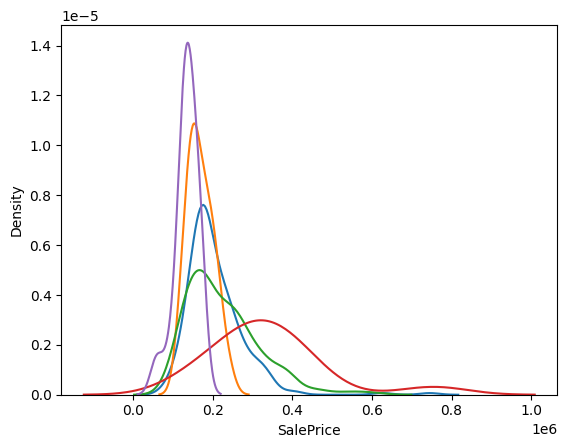

In [37]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)

plt.show()  # Before Imputation

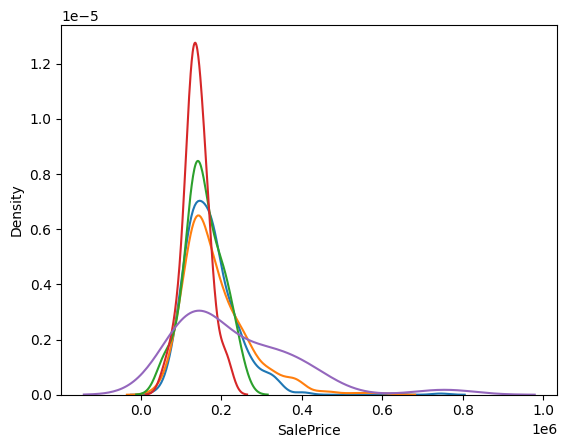

In [38]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)

plt.show()  # After Imputation

## Random Sample Imputation :

`PROS :`
- Easy to implement
- Preserves Variance of the Variable
- Well suited for `Linear Models` as it does not distort the Distribution,regardless of the % of NA

`CONS :`
- Not Reliable when high amount of Data is Missing
- Memory heavy for Deployment, as we need to store the original training set to extract values from & replace the NA in coming observations
